In [16]:
import requests
import pandas as pd
import re

Returns a list of locations (also known as sites) for which
results are available for the daily and three-hourly forecast
data feeds. You can use this to find the ID of the site that
you are interested in.

In [17]:
import csv
import json
# Greenwich, Greater London ID = 351683
# london openweatherapp city/2643743
response_hourly = requests.get("http://api.weatherapi.com/v1/forecast.json?key=4a1f9e155ac6494e98a15506222712&q=SE93HX&days=10&aqi=yes&alerts=yes") 


print ("code: {}".format(response_hourly.status_code))


#df = response_hourly.text


print ("\n")
print (response_hourly.text)

file = open("3_hour_forecast.json", "w")
file.write(response_hourly.text)
file.close()


# I need to create a file to store this into






code: 200


{"location":{"name":"Eltham","region":"London","country":"UK","lat":51.45,"lon":0.06,"tz_id":"Europe/London","localtime_epoch":1674911263,"localtime":"2023-01-28 13:07"},"current":{"last_updated_epoch":1674910800,"last_updated":"2023-01-28 13:00","temp_c":6.0,"temp_f":42.8,"is_day":1,"condition":{"text":"Overcast","icon":"//cdn.weatherapi.com/weather/64x64/day/122.png","code":1009},"wind_mph":4.3,"wind_kph":6.8,"wind_degree":290,"wind_dir":"WNW","pressure_mb":1032.0,"pressure_in":30.47,"precip_mm":0.0,"precip_in":0.0,"humidity":61,"cloud":100,"feelslike_c":4.4,"feelslike_f":40.0,"vis_km":10.0,"vis_miles":6.0,"uv":2.0,"gust_mph":6.5,"gust_kph":10.4,"air_quality":{"co":293.70001220703125,"no2":29.799999237060547,"o3":38.599998474121094,"so2":15.5,"pm2_5":10.699999809265137,"pm10":14.300000190734863,"us-epa-index":1,"gb-defra-index":1}},"forecast":{"forecastday":[{"date":"2023-01-28","date_epoch":1674864000,"day":{"maxtemp_c":5.4,"maxtemp_f":41.7,"mintemp_c":0.7,"mintemp_f":33

In [18]:

import json
import csv
 
with open('3_hour_forecast.json') as json_file:
    jsondata = json.load(json_file)
 
data_file = open('weather_forecast.csv', 'w', newline='')
csv_writer = csv.writer(data_file)
 
count = 0
for data in jsondata:
    if count == 0:
        header = jsondata[data].keys()
        csv_writer.writerow(header)
        count += 1
    csv_writer.writerow(jsondata[data].values())
 
data_file.close()


#df = pd.read_csv("weather_forecast.csv", sep='delimiter', header=None)
data=pd.read_csv("weather_forecast.csv", sep='\t')

df = pd.read_csv("weather_forecast.csv", delimiter=';', skiprows=0, low_memory=False)
print (df)

  name,region,country,lat,lon,tz_id,localtime_epoch,localtime
0  Eltham,London,UK,51.45,0.06,Europe/London,1674...         
1  1674910800,2023-01-28 13:00,6.0,42.8,1,"{'text...         
2  [{'date': '2023-01-28', 'date_epoch': 16748640...         
3                                                 []         


In [19]:
with open('weather_forecast.csv', 'r') as file:
    array = file.readlines()
    array = [row.split(',') for row in array]
temp_df = pd.read_csv("weather_forecast.csv", delimiter=';', skiprows=0, low_memory=False)


print (temp_df.head())



  name,region,country,lat,lon,tz_id,localtime_epoch,localtime
0  Eltham,London,UK,51.45,0.06,Europe/London,1674...         
1  1674910800,2023-01-28 13:00,6.0,42.8,1,"{'text...         
2  [{'date': '2023-01-28', 'date_epoch': 16748640...         
3                                                 []         


In [20]:
result = []

with open('weather_forecast.csv', 'r', encoding='UTF-8') as data:
    next(data)
    for record in data:
        result.append(record.split('-')[0])
print (result)



['Eltham,London,UK,51.45,0.06,Europe/London,1674911263,2023', '1674910800,2023', '"[{\'date\': \'2023', '[]\n']


In [21]:
file = open("weather_forecast.csv")


for row in file:
    row.split(",")


In [22]:
df = pd.read_json("3_hour_forecast.json")
df = df.fillna("0")
print (df)


                            location  \
name                          Eltham   
region                        London   
country                           UK   
lat                            51.45   
lon                             0.06   
tz_id                  Europe/London   
localtime_epoch           1674911263   
localtime           2023-01-28 13:07   
last_updated_epoch                 0   
last_updated                       0   
temp_c                             0   
temp_f                             0   
is_day                             0   
condition                          0   
wind_mph                           0   
wind_kph                           0   
wind_degree                        0   
wind_dir                           0   
pressure_mb                        0   
pressure_in                        0   
precip_mm                          0   
precip_in                          0   
humidity                           0   
cloud                              0   


In [23]:
df.describe()

,location,current,forecast,alerts
count,34,34,34,34
unique,9,23,2,2
top,0,0,0,0
freq,26,10,33,33


In [24]:
print (df)

                            location  \
name                          Eltham   
region                        London   
country                           UK   
lat                            51.45   
lon                             0.06   
tz_id                  Europe/London   
localtime_epoch           1674911263   
localtime           2023-01-28 13:07   
last_updated_epoch                 0   
last_updated                       0   
temp_c                             0   
temp_f                             0   
is_day                             0   
condition                          0   
wind_mph                           0   
wind_kph                           0   
wind_degree                        0   
wind_dir                           0   
pressure_mb                        0   
pressure_in                        0   
precip_mm                          0   
precip_in                          0   
humidity                           0   
cloud                              0   


In [26]:
df = pd.read_csv("greenhouse.csv")
df.head()

,country_or_area,year,value,category
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...


In [27]:
x = df.groupby(["country_or_area"])["value"].mean()

new_df = pd.DataFrame(x, columns=["value"])

new_df.head()

,value
country_or_area,
Australia,182187.274191
Austria,28140.834610
Belarus,47145.084054
Belgium,51824.463082
Bulgaria,21622.049086


In [28]:
new_df.columns

Index(['value'], dtype='object')

In [29]:
df.rename({"country_or_area": "country"})
df.head()

,country_or_area,year,value,category
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_or_area  8406 non-null   object 
 1   year             8406 non-null   int64  
 2   value            8406 non-null   float64
 3   category         8406 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 262.8+ KB


In [31]:
df

,country_or_area,year,value,category
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...
...,...,...,...,...
8401,United States of America,1994,593.222570,unspecified_mix_of_hydrofluorocarbons_hfcs_and...
8402,United States of America,1993,586.939752,unspecified_mix_of_hydrofluorocarbons_hfcs_and...
8403,United States of America,1992,574.414624,unspecified_mix_of_hydrofluorocarbons_hfcs_and...
8404,United States of America,1991,566.900968,unspecified_mix_of_hydrofluorocarbons_hfcs_and...


In [35]:
print (df.columns)

Index(['country_or_area', 'year', 'value', 'category'], dtype='object')


In [36]:

array = df["country_or_area"].unique()
new_df["country"] = array
new_df


,value,country
country_or_area,,
Australia,1.821873e+05,Australia
Austria,2.814083e+04,Austria
Belarus,4.714508e+04,Belarus
Belgium,5.182446e+04,Belgium
Bulgaria,2.162205e+04,Bulgaria
Canada,2.376913e+05,Canada
Croatia,1.097966e+04,Croatia
Cyprus,3.532154e+03,Cyprus
Czech Republic,5.833018e+04,Czech Republic


In [37]:
import plotly.express as px
new_df.rename({"value": "emission"}, axis=1, inplace=True)
print (new_df.columns)

Index(['emission', 'country'], dtype='object')


In [38]:
data = [dict(type="choropleth", autocolorscale=False, locations=new_df["country"], z=new_df["emission"], colorscale = "custom-colorscale", 
             colorbar = dict(title="Mean Greenhouse Emissions"))]
print (data)

[{'type': 'choropleth', 'autocolorscale': False, 'locations': country_or_area
Australia                                  Australia
Austria                                      Austria
Belarus                                      Belarus
Belgium                                      Belgium
Bulgaria                                    Bulgaria
Canada                                        Canada
Croatia                                      Croatia
Cyprus                                        Cyprus
Czech Republic                        Czech Republic
Denmark                                      Denmark
Estonia                                      Estonia
European Union                        European Union
Finland                                      Finland
France                                        France
Germany                                      Germany
Greece                                        Greece
Hungary                                      Hungary
Iceland              

In [59]:
layout = dict(title="Global Emissions", geo= dict(projection=dict(type=True), showlakes=True, lakecolor="rgb(66, 165, 245") )
layout

{'title': 'Global Emissions',
 'geo': {'projection': {'type': True},
  'showlakes': True,
  'lakecolor': 'rgb(66, 165, 245'}}

In [61]:
fig = dict(data=data, layout=layout)

from chart_studio import plotly as plotly


import plotly.tools as tls  


plotly.iplot(fig, filename)

ValueError: 
    Invalid value of type 'builtins.str' received for the 'colorscale' property of choropleth
        Received value: 'custom-colorscale'

    The 'colorscale' property is a colorscale and may be
    specified as:
      - A list of colors that will be spaced evenly to create the colorscale.
        Many predefined colorscale lists are included in the sequential, diverging,
        and cyclical modules in the plotly.colors package.
      - A list of 2-element lists where the first element is the
        normalized color level value (starting at 0 and ending at 1),
        and the second item is a valid color string.
        (e.g. [[0, 'green'], [0.5, 'red'], [1.0, 'rgb(0, 0, 255)']])
      - One of the following named colorscales:
            ['aggrnyl', 'agsunset', 'algae', 'amp', 'armyrose', 'balance',
             'blackbody', 'bluered', 'blues', 'blugrn', 'bluyl', 'brbg',
             'brwnyl', 'bugn', 'bupu', 'burg', 'burgyl', 'cividis', 'curl',
             'darkmint', 'deep', 'delta', 'dense', 'earth', 'edge', 'electric',
             'emrld', 'fall', 'geyser', 'gnbu', 'gray', 'greens', 'greys',
             'haline', 'hot', 'hsv', 'ice', 'icefire', 'inferno', 'jet',
             'magenta', 'magma', 'matter', 'mint', 'mrybm', 'mygbm', 'oranges',
             'orrd', 'oryel', 'oxy', 'peach', 'phase', 'picnic', 'pinkyl',
             'piyg', 'plasma', 'plotly3', 'portland', 'prgn', 'pubu', 'pubugn',
             'puor', 'purd', 'purp', 'purples', 'purpor', 'rainbow', 'rdbu',
             'rdgy', 'rdpu', 'rdylbu', 'rdylgn', 'redor', 'reds', 'solar',
             'spectral', 'speed', 'sunset', 'sunsetdark', 'teal', 'tealgrn',
             'tealrose', 'tempo', 'temps', 'thermal', 'tropic', 'turbid',
             'turbo', 'twilight', 'viridis', 'ylgn', 'ylgnbu', 'ylorbr',
             'ylorrd'].
        Appending '_r' to a named colorscale reverses it.


In [54]:
from chart_studio import plotly



ImportError: cannot import name 'plotly_plotly' from 'chart_studio' (/Users/thomasnguyen/opt/anaconda3/lib/python3.9/site-packages/chart_studio/__init__.py)

In [62]:
df = pd.read_csv("UK_temperature.csv")
df.head()

,Year,United_Kingdom,England,Northern_Ireland,Scotland,Wales,World_CO2_PPM
0,1901,8.19,8.84,8.20,7.03,8.51,NaN
1,1902,7.91,8.62,8.03,6.56,8.41,NaN
2,1903,8.08,8.85,8.04,6.68,8.47,NaN
3,1904,8.13,8.87,8.06,6.82,8.48,NaN
4,1905,8.27,8.94,8.32,7.04,8.66,297.6


In [63]:
df.isna().sum()

Year                 0
United_Kingdom       0
England              0
Northern_Ireland     0
Scotland             0
Wales                0
World_CO2_PPM       65
dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              121 non-null    int64  
 1   United_Kingdom    121 non-null    float64
 2   England           121 non-null    float64
 3   Northern_Ireland  121 non-null    float64
 4   Scotland          121 non-null    float64
 5   Wales             121 non-null    float64
 6   World_CO2_PPM     56 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 6.7 KB


In [66]:
df = df.fillna(0)

In [67]:
df.corr()

,Year,United_Kingdom,England,Northern_Ireland,Scotland,Wales,World_CO2_PPM
Year,1.000000,0.591666,0.588755,0.540874,0.602903,0.529332,0.632147
United_Kingdom,0.591666,1.000000,0.994702,0.974142,0.979208,0.988877,0.370531
England,0.588755,0.994702,1.000000,0.953013,0.954310,0.985826,0.377812
Northern_Ireland,0.540874,0.974142,0.953013,1.000000,0.975081,0.976901,0.317796
Scotland,0.602903,0.979208,0.954310,0.975081,1.000000,0.955349,0.363314
Wales,0.529332,0.988877,0.985826,0.976901,0.955349,1.000000,0.326035
World_CO2_PPM,0.632147,0.370531,0.377812,0.317796,0.363314,0.326035,1.000000


In [68]:
df.head()

,Year,United_Kingdom,England,Northern_Ireland,Scotland,Wales,World_CO2_PPM
0,1901,8.19,8.84,8.20,7.03,8.51,0.0
1,1902,7.91,8.62,8.03,6.56,8.41,0.0
2,1903,8.08,8.85,8.04,6.68,8.47,0.0
3,1904,8.13,8.87,8.06,6.82,8.48,0.0
4,1905,8.27,8.94,8.32,7.04,8.66,297.6


In [69]:
df.rename({"World_CO2_PPM": "co2"}, axis=1, inplace=True)

df.columns

Index(['Year', 'United_Kingdom', 'England', 'Northern_Ireland', 'Scotland',
       'Wales', 'co2'],
      dtype='object')

(0.5887552305908867, 1.2264765495732714e-12)


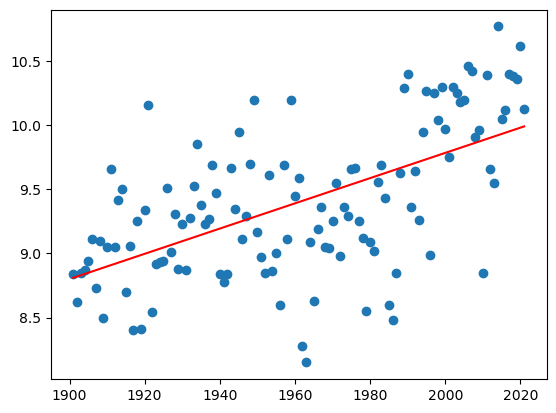

In [77]:
import matplotlib.pyplot as plt

plt.scatter(df.Year, df.England)
from scipy.stats import *

print (pearsonr(df.Year, df.England))

import numpy as np  

reg = np.polyfit(df.Year, df.England, deg=1)
trend = np.polyval(reg, df.Year)
plt.plot(df.Year, trend, color="r")

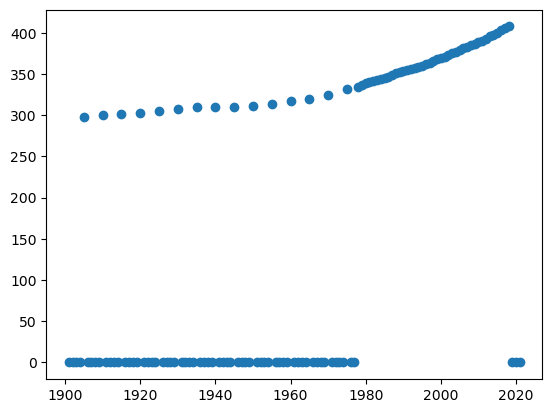

In [79]:
from chart_studio import plotly

In [80]:
plotly.

TypeError: 'module' object is not callable

In [81]:
year_2021 = df[df.Year == 2021] 

year_2021

,Year,United_Kingdom,England,Northern_Ireland,Scotland,Wales,co2
120,2021,9.38,10.13,9.27,8.06,9.7,0.0


In [89]:
import plotly.graph_objects as go

df = pd.read_csv("UK_temperature.csv")
array = ["United_Kingdom", "England", "Northern_Ireland", "Scotland", "Wales", "co2"]
df["text"] = "Location: " + str(array)

df

,Year,United_Kingdom,England,Northern_Ireland,Scotland,Wales,World_CO2_PPM,text
0,1901,8.19,8.84,8.20,7.03,8.51,NaN,"Location: ['United_Kingdom', 'England', 'North..."
1,1902,7.91,8.62,8.03,6.56,8.41,NaN,"Location: ['United_Kingdom', 'England', 'North..."
2,1903,8.08,8.85,8.04,6.68,8.47,NaN,"Location: ['United_Kingdom', 'England', 'North..."
3,1904,8.13,8.87,8.06,6.82,8.48,NaN,"Location: ['United_Kingdom', 'England', 'North..."
4,1905,8.27,8.94,8.32,7.04,8.66,297.60,"Location: ['United_Kingdom', 'England', 'North..."
...,...,...,...,...,...,...,...,...
116,2017,9.62,10.40,9.35,8.29,9.84,405.19,"Location: ['United_Kingdom', 'England', 'North..."
117,2018,9.49,10.38,9.02,7.99,9.73,407.58,"Location: ['United_Kingdom', 'England', 'North..."
118,2019,9.55,10.36,9.24,8.19,9.71,NaN,"Location: ['United_Kingdom', 'England', 'North..."
119,2020,9.68,10.62,9.15,8.11,9.87,NaN,"Location: ['United_Kingdom', 'England', 'North..."


In [102]:
temp = []
temp.append(df.United_Kingdom)
temp.append(df.England)
temp.append(df.Northern_Ireland)
temp.append(df.Scotland)
temp.append(df.Wales)


In [104]:
fig = go.Figure(data=go.Choropleth(
    locations=df["text"],
    z=df["Year"].astype(float),
    locationmode="country names",
    colorscale="Blues",
    colorbar_title="Temperature for each Region",
    text=df["text"] # Hover text
))

fig.update_layout(
    title_text="2021 temperatures",
    geo_scope="europe",
    
)

fig.show()

In [105]:
a = ['africa', 'asia', 'europe', 'north america', 'south america', 'usa', 'world']

In [9]:
df = pd.read_csv("greenhouse.csv")

df.rename({"country_or_area": "country"}, axis=1, inplace=True)
df["text"] = "Location: " + df["country"]

df.groupby(["country"])["value"].mean().sort_values(ascending=False)

country
United States of America    2.084439e+06
European Union              1.531488e+06
Russian Federation          9.754069e+05
Japan                       4.516332e+05
Germany                     3.123673e+05
Canada                      2.376913e+05
Ukraine                     2.004412e+05
Italy                       1.824132e+05
Australia                   1.821873e+05
France                      1.800495e+05
United Kingdom              1.740014e+05
Poland                      1.631114e+05
Turkey                      1.370795e+05
Spain                       1.010394e+05
Netherlands                 8.163119e+04
Romania                     5.861314e+04
Czech Republic              5.833018e+04
Belgium                     5.182446e+04
Belarus                     4.714508e+04
Greece                      4.470396e+04
Portugal                    3.062277e+04
New Zealand                 2.889024e+04
Austria                     2.814083e+04
Hungary                     2.785024e+04
Denmark 

In [8]:
import pandas as pd
import plotly.graph_objects as go

emission = pd.read_csv("greenhouse.csv")
emission.rename({"country_or_area": "country"}, axis=1, inplace=True)
emission["text"] = "Location: " + emission["country"]



fig = go.Figure(data=go.Choropleth(
    locations=emission["text"],
    z=emission["value"].astype(float),
    locationmode="country names",
    colorscale="thermal",
    colorbar_title="emission",
    text=emission["text"] # Hover text
))

fig.update_layout(
    title_text="Greenhouse emission",
    geo_scope="world",
    
)

fig.show()

In [3]:
# I need to create an A.I that predicts temperatures
import pandas as pd
df = pd.read_csv("UK_temperature.csv")

df = df.fillna(0)
df.head()

,Year,United_Kingdom,England,Northern_Ireland,Scotland,Wales,World_CO2_PPM
0,1901,8.19,8.84,8.20,7.03,8.51,0.0
1,1902,7.91,8.62,8.03,6.56,8.41,0.0
2,1903,8.08,8.85,8.04,6.68,8.47,0.0
3,1904,8.13,8.87,8.06,6.82,8.48,0.0
4,1905,8.27,8.94,8.32,7.04,8.66,297.6


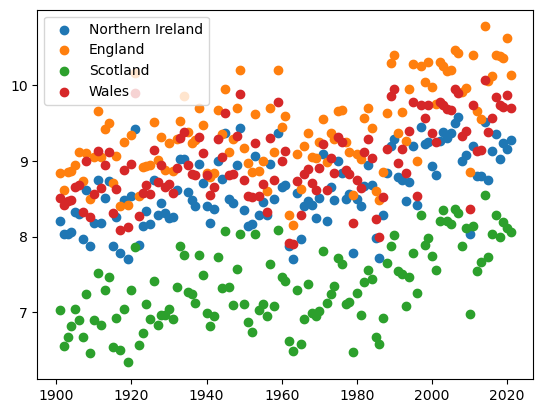

In [4]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.scatter(df.Year, df.Northern_Ireland)
plt.scatter(df.Year, df.England)
plt.scatter(df.Year, df.Scotland)
plt.scatter(df.Year, df.Wales)

plt.legend(["Northern Ireland", "England", "Scotland", "Wales"])
plt.show()

In [5]:
from scipy.stats import *
pearsonr(df.Year, df.England)

(0.5887552305908867, 1.2264765495732714e-12)

In [7]:

import pandas as pd
import numpy as np
from scipy.stats import *
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
import os

In [8]:
lm = LinearRegression()

In [29]:
df.columns

Index(['Year', 'United_Kingdom', 'England', 'Northern_Ireland', 'Scotland',
       'Wales', 'World_CO2_PPM'],
      dtype='object')

In [47]:
X = df.drop(["United_Kingdom", "England", "Northern_Ireland", "Scotland", "Wales", "World_CO2_PPM"], axis=1)
y = df["United_Kingdom"].values.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)
model = CatBoostRegressor(iterations=7000, learning_rate=0.03, loss_function="RMSE")
model.fit(X_train, Y_train, eval_set= (X_test, Y_test))

print (model.score(X, y))
                                    
pred = model.predict(X_test)    

print ("\n")
print ("==== ACCURACY ==== ")
print (r2_score(Y_test, pred))            

0:	learn: 0.5460064	test: 0.5252966	best: 0.5252966 (0)	total: 474us	remaining: 3.32s
1:	learn: 0.5401879	test: 0.5199178	best: 0.5199178 (1)	total: 935us	remaining: 3.27s
2:	learn: 0.5342877	test: 0.5135398	best: 0.5135398 (2)	total: 1.06ms	remaining: 2.47s
3:	learn: 0.5297093	test: 0.5085673	best: 0.5085673 (3)	total: 1.25ms	remaining: 2.18s
4:	learn: 0.5251666	test: 0.5040342	best: 0.5040342 (4)	total: 1.36ms	remaining: 1.91s
5:	learn: 0.5199603	test: 0.4987056	best: 0.4987056 (5)	total: 1.52ms	remaining: 1.77s
6:	learn: 0.5149590	test: 0.4934753	best: 0.4934753 (6)	total: 1.67ms	remaining: 1.67s
7:	learn: 0.5096047	test: 0.4874209	best: 0.4874209 (7)	total: 1.86ms	remaining: 1.62s
8:	learn: 0.5045068	test: 0.4823636	best: 0.4823636 (8)	total: 2.06ms	remaining: 1.6s
9:	learn: 0.5001315	test: 0.4778088	best: 0.4778088 (9)	total: 2.2ms	remaining: 1.54s
10:	learn: 0.4960021	test: 0.4739675	best: 0.4739675 (10)	total: 2.25ms	remaining: 1.43s
11:	learn: 0.4920304	test: 0.4701808	best: 0.

0.5012899402345679

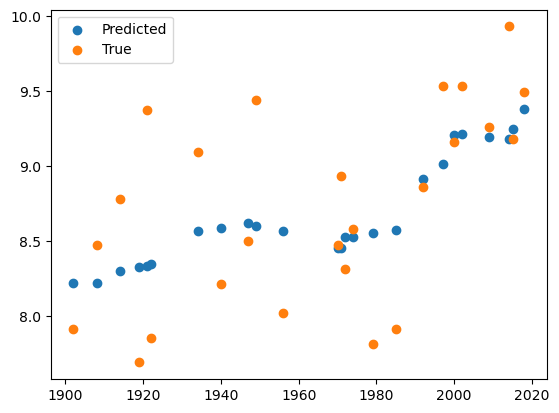

In [46]:
plt.scatter(X_test, pred)
plt.scatter(X_test, Y_test)

plt.legend(["Predicted", "True"])



In [49]:
df.rename({"World_CO2_PPM": "co2"}, axis=1, inplace=True)

df.corr()

,Year,United_Kingdom,England,Northern_Ireland,Scotland,Wales,co2
Year,1.000000,0.591666,0.588755,0.540874,0.602903,0.529332,0.632147
United_Kingdom,0.591666,1.000000,0.994702,0.974142,0.979208,0.988877,0.370531
England,0.588755,0.994702,1.000000,0.953013,0.954310,0.985826,0.377812
Northern_Ireland,0.540874,0.974142,0.953013,1.000000,0.975081,0.976901,0.317796
Scotland,0.602903,0.979208,0.954310,0.975081,1.000000,0.955349,0.363314
Wales,0.529332,0.988877,0.985826,0.976901,0.955349,1.000000,0.326035
co2,0.632147,0.370531,0.377812,0.317796,0.363314,0.326035,1.000000


In [51]:
pearsonr(df.Year, df.co2)


(0.6321474851028426, 7.481171649912142e-15)

In [52]:
df = pd.read_csv("greenhouse.csv")
df.head()

,country_or_area,year,value,category
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...


In [62]:
x = df.groupby(["year"])["value"].mean()
x = pd.DataFrame(x)

array = []

for i in range(1990, 2015):
    array.append(i)
x["year"] = array

x

,value,year
year,,
1990,241247.761880,1990
1991,233382.414748,1991
1992,222868.456697,1992
1993,218740.399791,1993
1994,212603.188018,1994
1995,205569.040900,1995
1996,208074.767742,1996
1997,204968.893032,1997
1998,203379.778773,1998


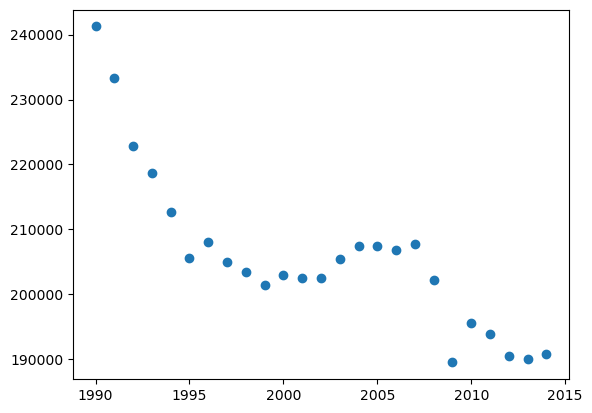

In [63]:
plt.scatter(x.year, x.value)

In [65]:
df["country_or_area"].unique()

array(['Australia', 'Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Canada',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'European Union', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Monaco',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Russian Federation', 'Slovakia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom',
       'United States of America'], dtype=object)

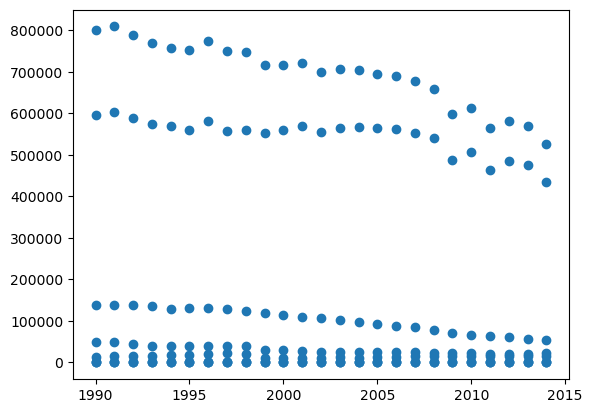

In [67]:
UK = df[df["country_or_area"] == "United Kingdom"]

plt.scatter(UK.year, UK.value)